In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

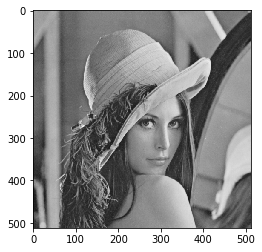

In [2]:
img = Image.open('lena.bmp')
original_lena_plt = plt.imshow(np.asarray(img), cmap='gray', vmin=0, vmax=255)

In [3]:
def binarize(img, threshold):
    height, width = img.size
    new_img = np.empty(shape=(height, width))
    img = np.asarray(img)
    for i in range(width):
        for j in range(height):
            if img[i][j] > 128:
                new_img[i][j] = 255
            else:
                new_img[i][j] = 0
                
    return new_img.astype('uint8')

def histogram(img):
    h = [0]*256
    height, width = img.size
    img = np.asarray(img)
    for i in range(width):
        for j in range(height):
            h[img[i][j]] += 1
    
    #plt.hist(img.ravel(), 255, [0, 256])
    #plt.savefig('histogram.png')
    
    #print(h)
    h_ = []
    for i in range(len(h)):
        if h[i] == 0:
            continue
        else:
            temp_h = [i] * h[i]
            h_ = h_ + temp_h
    #print(len(h_))
    bins = range(0, 256)
    plt.hist(h_, bins=bins, alpha=0.8, histtype='bar', color='blue', ec='blue')
    #ind = np.arange(256)  # the x locations for the groups
    #fig, ax = plt.subplots()
    #rects1 = ax.bar(ind, h, color='b')
    
    return h

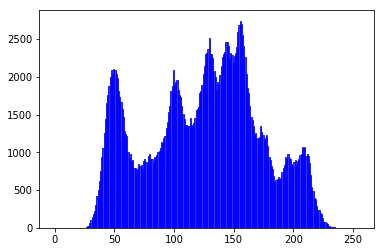

In [4]:
binarized_img = Image.fromarray(binarize(img, 128), 'L')
binarized_img.save('binarized-lena.bmp')
#binarized_lena_plt = plt.imshow(np.asarray(binarized_img), cmap='gray', vmin=0, vmax=255)
h = histogram(img)

In [5]:
def find_connected_components(img):
    height, width = img.size
    bin_img = np.empty(shape=(height, width), dtype=int)
    label_img = np.empty(shape=(height, width), dtype=int)
    img = np.asarray(img)
    for i in range(width):
        for j in range(height):
            if img[i][j] > 128:
                bin_img[i][j] = 1
            else:
                bin_img[i][j] = 0
    
    label = 1
    for i in range(width):
        for j in range(height):
            if bin_img[i][j] == 1:
                label_img[i][j] = label
                label += 1
                
    for i in range(width):
        for j in range(height):
            if label_img[i][j] != 0:
                if (i == 0 and j == 0):
                    lt = []
                    lt.append(label_img[i][j+1])
                    lt.append(label_img[i][j])
                    lt.append(label_img[i+1][j])
                    lt.append(label_img[i+1][j+1])
                elif (i == height - 1 and j == 0):
                    lt = []
                    lt.append(label_img[i-1][j])
                    lt.append(label_img[i][j])
                    lt.append(label_img[i-1][j+1])
                    lt.append(label_img[i][j+1])
                elif (i == 0 and j == width - 1):
                    lt = []
                    lt.append(label_img[i][j-1])
                    lt.append(label_img[i][j])
                    lt.append(label_img[i+1][j-1])
                    lt.append(label_img[i+1][j])
                elif (i == height - 1 and j == width - 1):
                    lt = []
                    lt.append(label_img[i-1][j-1])
                    lt.append(label_img[i-1][j])
                    lt.append(label_img[i][j])
                    lt.append(label_img[i][j-1])
                else:
                    if j == 0:
                        lt = []
                        lt.append(label_img[i-1][j])
                        lt.append(label_img[i-1][j+1])
                        lt.append(label_img[i][j+1])
                        lt.append(label_img[i+1][j])
                        lt.append(label_img[i][j])
                        lt.append(label_img[i+1][j+1])
                    elif i == 0:
                        lt = []
                        lt.append(label_img[i][j-1])
                        lt.append(label_img[i][j+1])
                        lt.append(label_img[i+1][j-1])
                        lt.append(label_img[i+1][j])
                        lt.append(label_img[i][j])
                        lt.append(label_img[i+1][j+1])
                    elif j == width - 1:
                        lt = []
                        lt.append(label_img[i-1][j-1])
                        lt.append(label_img[i-1][j])
                        lt.append(label_img[i][j-1])
                        lt.append(label_img[i+1][j-1])
                        lt.append(label_img[i][j])
                        lt.append(label_img[i+1][j])
                    elif i == height - 1:
                        lt = []
                        lt.append(label_img[i-1][j-1])
                        lt.append(label_img[i-1][j])
                        lt.append(label_img[i-1][j+1])
                        lt.append(label_img[i][j-1])
                        lt.append(label_img[i][j+1])
                        lt.append(label_img[i][j])
                    else:
                        lt = []
                        lt.append(label_img[i-1][j-1])
                        lt.append(label_img[i-1][j])
                        lt.append(label_img[i-1][j+1])
                        lt.append(label_img[i][j-1])
                        lt.append(label_img[i][j+1])
                        lt.append(label_img[i][j])
                        lt.append(label_img[i+1][j-1])
                        lt.append(label_img[i+1][j])
                        lt.append(label_img[i+1][j+1])
                lt= list(set(lt))
                if 0 in lt:
                    lt.remove(0)
                label_img[i][j] = min(lt)
    
    return label_img

label_img = find_connected_components(img)